# Imputación univariada

En esta lección veremos la primera técnica de manejo de observaciones faltantes en una Serie de Tiempo: la imputación univariada.

Recordemos, de la lección anterior, que el manejo de datos faltantes se reduce esencialmente a dos opciones:

- La imputación que consiste en usar los registros conocidos en la Serie de Tiempo para intentar completar los datos faltantes
- La eliminación de los registros faltantes que debemos realizar cuando ninguna de las técnicas de imputación arroja resultados adecuados.

Así que en esta lección nos enfocaremos en la imputación univariada, donde este último término se refiere a que usaremos la propia observación que contiene registros incompletos para determinar los valores faltantes. El hecho de usar la propia observación implica que usaremos sólo una variable para realizar la imputación: de allí el término "imputación univariada".

En particular veremos dos maneras de hacer esta imputación univariada: usando la librería Pandas y usando la librería Scikit-Learn.

## 1. Función auxiliar

Comencemos creando una función auxiliar que facilitará la visualización de las Series de Tiempo antes y después de la imputación:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def graficar_serie(df, obs='', titulo=''):
    '''
    Permite graficar la Serie de Tiempo y mostrar simultáneamente
    sus valores extremos.
    
    Parámetros:
    - df: DataFrame de Pandas con la(s) Serie(s) de Tiempo
    - obs: nombre de la columna a graficar
    - titulo: el título del gráfico
    '''
    # Gráfico vacío
    fig, ax = plt.subplots(1,1)
    
    # Gráfico inicial
    if type(df) == pd.DataFrame:
        ax = sns.pointplot(data=df, x=df.index, y=obs, markers='')
    else:
        # Convertir Serie de Pandas a DataFrame de Pandas y graficar
        df = df.to_frame(name=obs) 
        ax = sns.pointplot(data=df, x=df.index, y=obs, markers='')
    
    # Dibujar sólo N=10 marcas temporales (en caso de tener series de tiempo)
    # con demasiadas marcas
    n_ticks = 10
    locator = mdates.AutoDateLocator(maxticks=n_ticks)
    ax.xaxis.set_major_locator(locator)
   
    # Rotar los ticks 45°
    plt.xticks(rotation=45)
    
    # Etiquetas ejes horizontal y vertical
    plt.xlabel('Tiempo')
    plt.ylabel(obs)
    plt.title(titulo);


            Valores
2020-04-01      1.0
2020-04-02      2.0
2020-04-03      NaN
2020-04-04      4.0
2020-04-05      NaN
2020-04-06      NaN
2020-04-07      3.0
2020-04-08      4.0
2020-04-09      9.0
2020-04-10     10.0


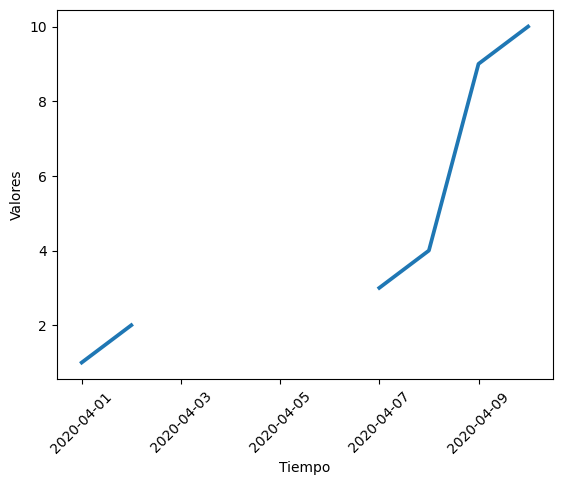

In [2]:
# Ejemplo de uso de las funciones anteriores

# Dataset de prueba
fechas = pd.date_range(start='2020-04-01', end='2020-04-10')
datos = [1, 2, None, 4, None, None, 3, 4, 9, 10]
df = pd.DataFrame(datos, index=fechas, columns=['Valores'])
print(df)

# Graficar
graficar_serie(df, obs='Valores')

## 2. Los sets de datos

En este caso usaremos los sets:

- *co2_faltantes.csv*: registro histórico de niveles de CO2 en la atmósfera
- *clicks_obs_faltantes.csv*: información de interacción de usuarios (número de clicks) de un sitio web de artículos de vestuario.

Comencemos leyendo y mostrando cada set de datos:

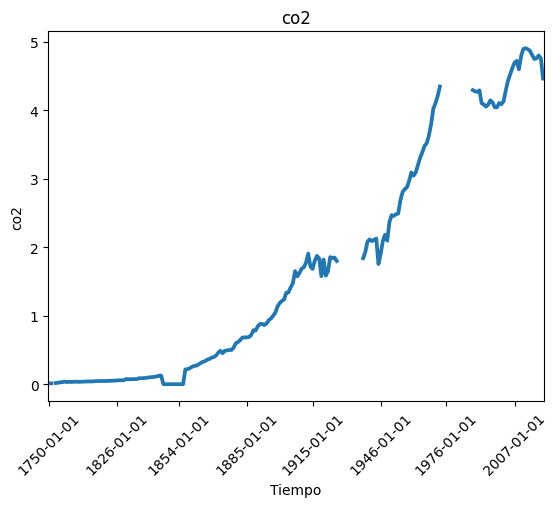

In [3]:
import pandas as pd

# Leer dataset co2_faltantes.csv
RUTA = '/Users/miguel/Library/CloudStorage/GoogleDrive-miguel@codificandobits.com/My Drive/02-CODIFICANDOBITS.COM/04-Academia/01-Cursos/23-2024-05-SeriesDeTiempo-Preprocesamiento/data/'

co2_df = pd.read_csv(RUTA + 'co2_faltantes.csv',
                    parse_dates = ['año'],
                    index_col = ['año'])
graficar_serie(co2_df, 'co2', 'co2')

Vemos que la Serie de Tiempo contiene observaciones faltantes.

Vamos ahora a *clicks_obs_faltantes.csv*:

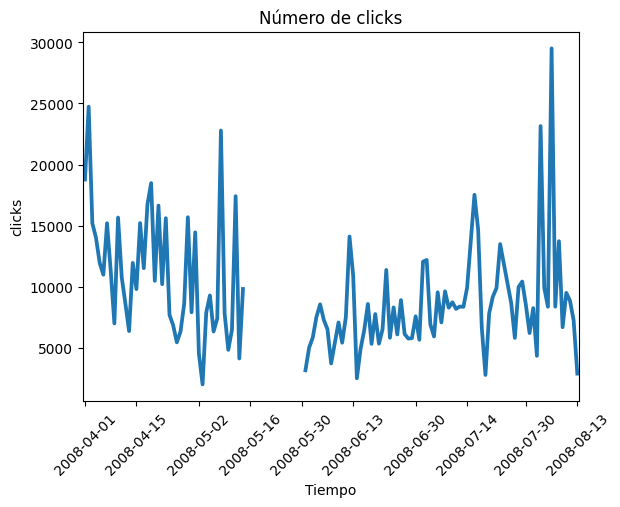

In [4]:
# Leer dataset clicks_obs_faltantes.csv
clicks_df = pd.read_csv(RUTA + 'clicks_obs_faltantes.csv',
                       parse_dates = ['fecha'],
                       index_col = ['fecha'])
graficar_serie(clicks_df, 'clicks', 'Número de clicks')

Y en este caso también hay observaciones faltantes en la Serie.

Muy bien, con esto ya estamos listos para ver las diferentes técnicas de imputación.

## 1. Imputación univariada usando Pandas

La idea es usar los valores conocidos en la variable observada para imputar los valores faltantes. En particular podemos:

- Realizar imputación por la media
- Realizar imputación por llenado hacia adelante: tomar el valor de la última observación (antes del dato faltante) para realizar la imputación.
- Realizar la imputación por llenado hacia atrás: tomar el valor de la siguiente observación (después del dato faltante) para realizar la imputación.

Veamos cómo implementar cada una de estas técnicas de imputación usando Pandas.

### 1.1. Imputación por la media

Consiste simplemente en reemplazar los valores faltantes con el promedio de la Serie de Tiempo. Para ello podemos usar el método `fillna()` de Pandas.

Realicemos la imputación por la media para la serie *co2_df* y grafiquemos el comparativo antes y después de la imputación:

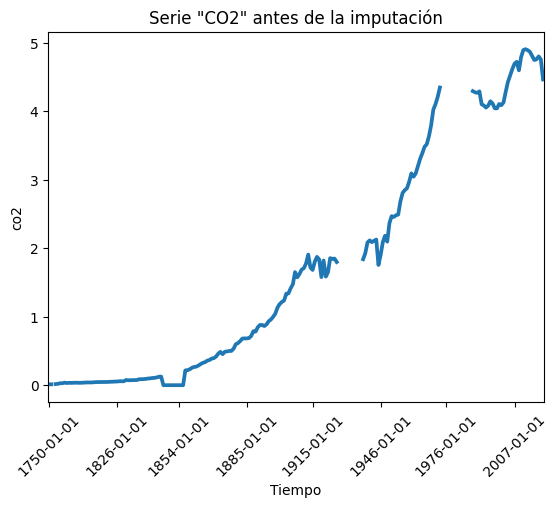

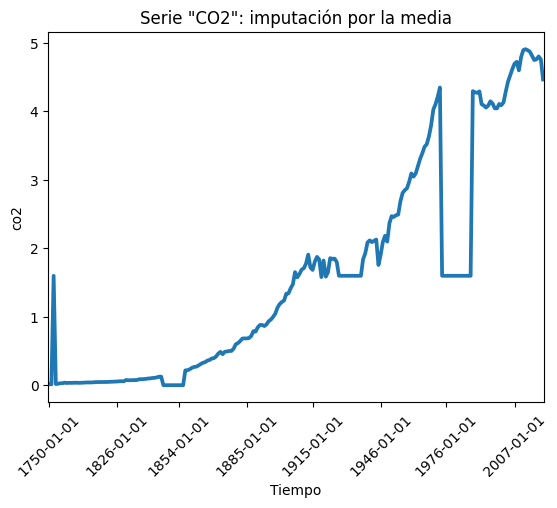

In [5]:
# Imputación por la media
co2_df_imp = co2_df['co2'].fillna(co2_df['co2'].mean())

# Gráficos antes y después de la imputación
graficar_serie(co2_df, obs='co2', titulo='Serie "CO2" antes de la imputación')
graficar_serie(co2_df_imp, obs='co2', titulo='Serie "CO2": imputación por la media')

En este caso vemos que la imputación por la media no resulta adecuada pues la Serie tiene tendencia y por tanto su media es relativamente constante a pesar de que los valores de la Serie se incrementan a lo largo del tiempo.

Veamos esta misma imputación pero en la serie *clicks_df*:

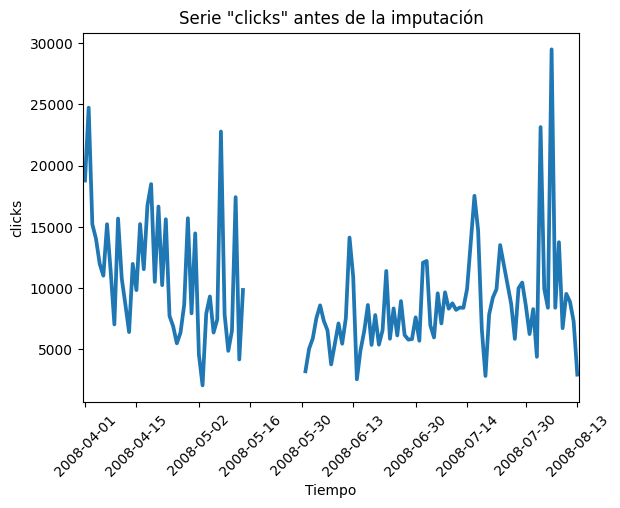

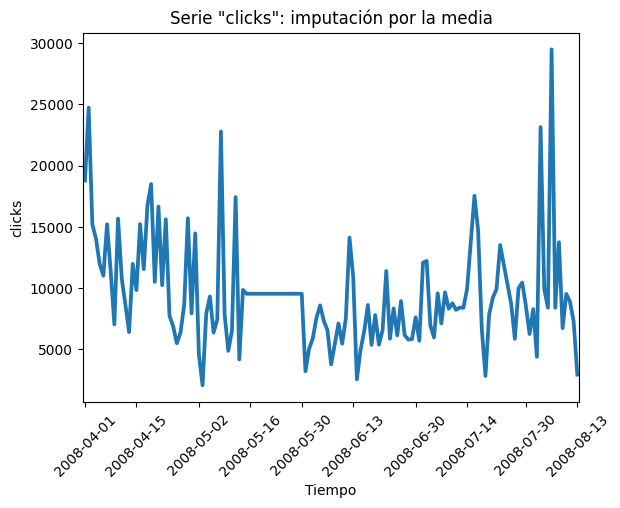

In [6]:
# Imputación por la media
clicks_df_imp = clicks_df['clicks'].fillna(clicks_df['clicks'].mean())

# Gráficos antes y después de la imputación
graficar_serie(clicks_df, obs='clicks', titulo='Serie "clicks" antes de la imputación')
graficar_serie(clicks_df_imp, obs='clicks', titulo='Serie "clicks": imputación por la media')

En este caso vemos que tampoco resulta adecuada la imputación por la media puesto que a pesar de que la Serie no tiene tendencia sí posee muchas variaciones entre instantes de tiempo consecutivos.

Así que podemos resumir lo siguiente:

> **La imputación por la media funciona adecuadamente cuando tenemos pocas variaciones en la Serie o cuando esta NO tiene tendencia o estacionalidad**

### 1.2. Imputación por llenado hacia adelante (*forward fill*)

Consiste en tomar el valor de la última observación (antes del dato faltante) para realizar la imputación.

Por ejemplo, en la Serie:

|   Índice   | Observación |
|:----------:|:-----------:|
| 2020-01-01 | 0.25        |
| 2020-01-02 | 3.27        |
| 2020-01-03 | NaN         |
| 2020-01-04 | NaN         |
| 2020-01-05 | 3.22        |
| 2020-01-06 | 3.24        |

La última observación antes del primer dato faltante es igual a 3.27. Así que usamos este valor para completar los dos datos faltantes siguientes. Entonces la serie con valores imputados sería:

|   Índice   | Observación |
|:----------:|:-----------:|
| 2020-01-01 | 0.25        |
| 2020-01-02 | 3.27        |
| 2020-01-03 | **3.27**         |
| 2020-01-04 | **3.27**       |
| 2020-01-05 | 3.22        |
| 2020-01-06 | 3.24        |

Para realizar esta imputación en Pandas podemos seguir usando el método `fillna()` y agregar el parámetro `method = 'ffill'`.

Veamos cómo realizar la imputación sobre la Serie *co2_df*:

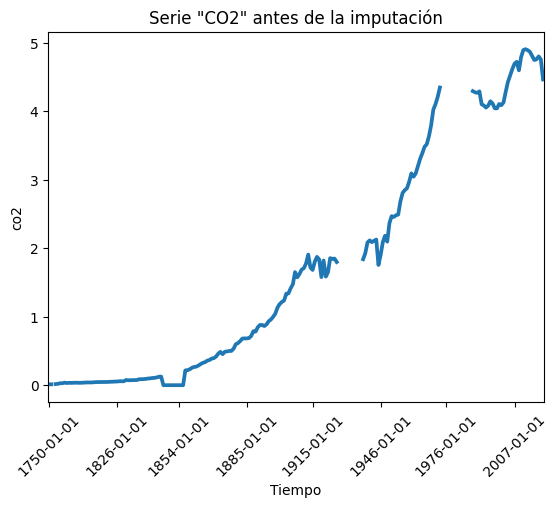

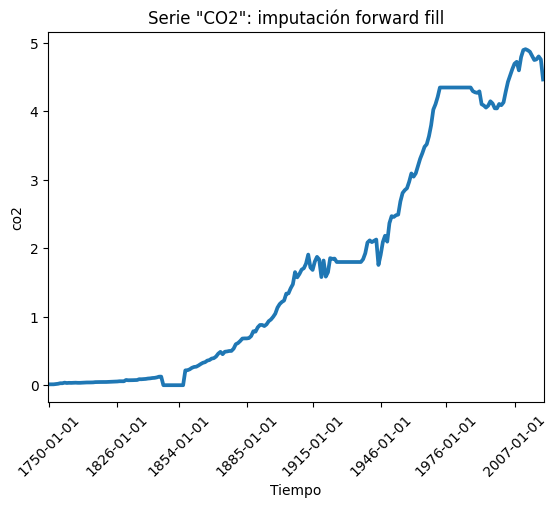

In [7]:
# Imputación "forward fill"
co2_df_imp = co2_df['co2'].fillna(method='ffill')

# Gráficos antes y después de la imputación
graficar_serie(co2_df, obs='co2', titulo='Serie "CO2" antes de la imputación')
graficar_serie(co2_df_imp, obs='co2', titulo='Serie "CO2": imputación forward fill')

En este caso vemos que la imputación preserva mejor las características de la Serie de Tiempo.

Realicemos ahora la imputación de la Serie *clicks_df*:

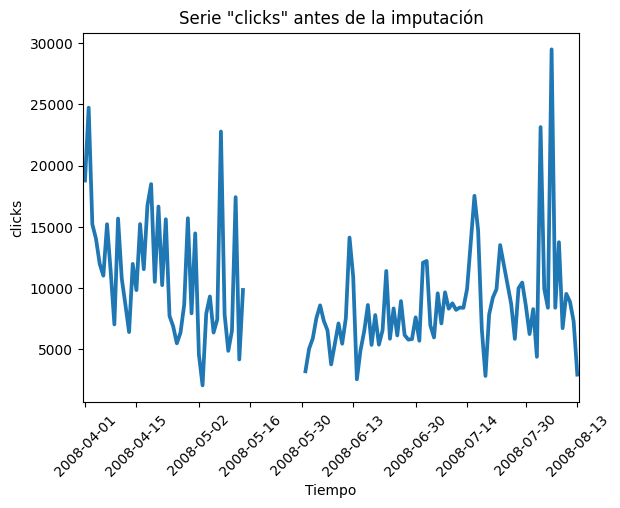

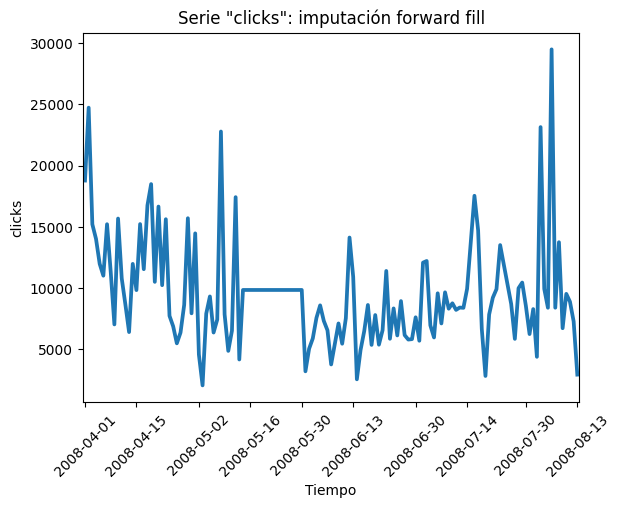

In [8]:
# Imputación con forward fill
clicks_df_imp = clicks_df['clicks'].fillna(method='ffill')

# Gráficos antes y después de la imputación
graficar_serie(clicks_df, obs='clicks', titulo='Serie "clicks" antes de la imputación')
graficar_serie(clicks_df_imp, obs='clicks', titulo='Serie "clicks": imputación forward fill')

Y en este caso ocurre algo similar a la imputación por la media.

Este método de llenado hacia adelante tiene un inconveniente: si el valor de referencia es un valor extremo (o muy grande o muy pequeño) la imputación generará igualmente un bloque de valores extremos.

Así que podemos resumir lo siguiente:

> **La imputación con llenado hacia adelante (*forward fill*) resulta adecuada si la Serie NO contiene valores extremos pero es mejor que la imputación por la media si la Serie tiene tendencia o estacionalidad**

### 1.3. Imputación por llenado hacia atrás (*backward fill*)

Consiste en tomar el valor de la primera observación (después del dato faltante) para realizar la imputación.

Por ejemplo, en la Serie:

|   Índice   | Observación |
|:----------:|:-----------:|
| 2020-01-01 | 0.25        |
| 2020-01-02 | 3.27        |
| 2020-01-03 | NaN         |
| 2020-01-04 | NaN         |
| 2020-01-05 | 3.22        |
| 2020-01-06 | 3.24        |

La primera observación antes del primer dato faltante es igual a 3.22. Así que usamos este valor para completar los dos datos faltantes siguientes. Entonces la serie con valores imputados sería:

|   Índice   | Observación |
|:----------:|:-----------:|
| 2020-01-01 | 0.25        |
| 2020-01-02 | 3.27        |
| 2020-01-03 | **3.22**         |
| 2020-01-04 | **3.22**       |
| 2020-01-05 | 3.22        |
| 2020-01-06 | 3.24        |

Para realizar esta imputación en Pandas podemos seguir usando el método `fillna()` y agregar el parámetro `method = 'bfill'`.

Veamos cómo realizar la imputación sobre la Serie *co2_df*:

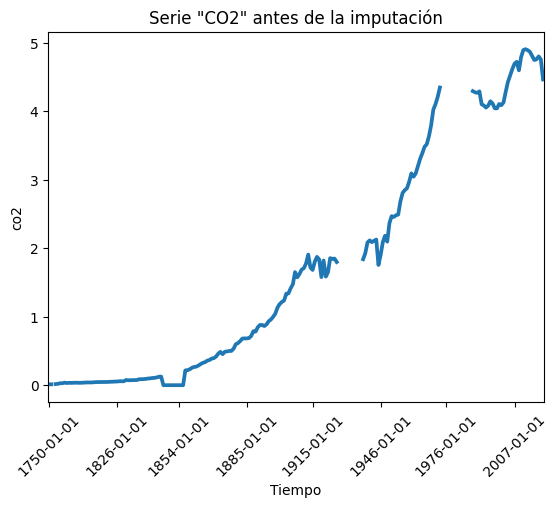

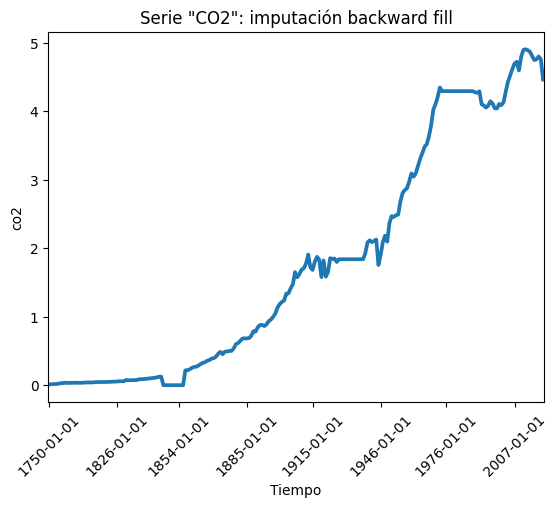

In [9]:
# Imputación "backward fill"
co2_df_imp = co2_df['co2'].fillna(method='bfill')

# Gráficos antes y después de la imputación
graficar_serie(co2_df, obs='co2', titulo='Serie "CO2" antes de la imputación')
graficar_serie(co2_df_imp, obs='co2', titulo='Serie "CO2": imputación backward fill')

El resultado es muy parecido al obtenido con el llenado hacia adelante.

Veamos lo que sucede al realizar esta imputación en la Serie *clicks_df*:

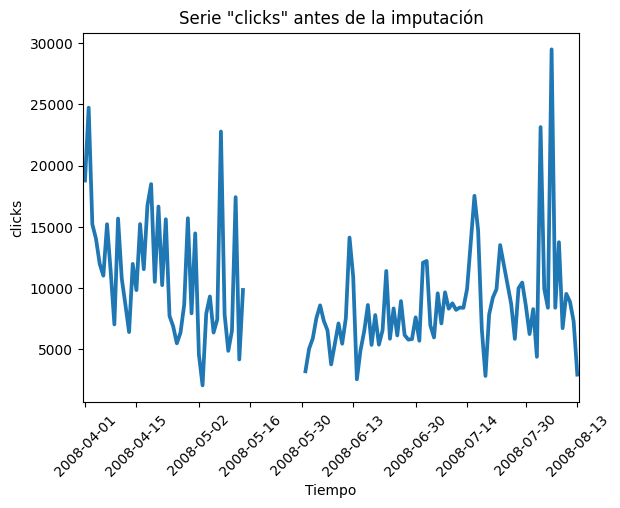

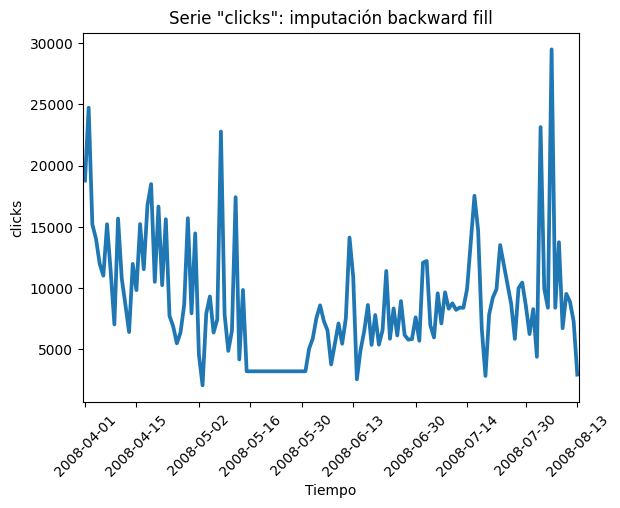

In [10]:
# Imputación con backward fill
clicks_df_imp = clicks_df['clicks'].fillna(method='bfill')

# Gráficos antes y después de la imputación
graficar_serie(clicks_df, obs='clicks', titulo='Serie "clicks" antes de la imputación')
graficar_serie(clicks_df_imp, obs='clicks', titulo='Serie "clicks": imputación backward fill')

En este caso sí hay una diferencia en la imputación: los valores imputados con *backward fill* son menores (del orden de 2.500) que los obtenidos con la imputación *forward fill* (del orden de 10.000). Esto resalta la dependencia de estos dos métodos de los valores extremos.

## 2. Imputación univariada usando Scikit-Learn

También podemos usar esta librería para realizar la imputación. La lógica de funcionamiento es la misma: usar los valores conocidos en la variable observada para imputar los valores faltantes.

En el caso de Scikit-Learn podemos usar el módulo `SimpleImputer` para realizar este tipo de imputación usando:

- La media
- La mediana
- El valor más frecuente

Veamos cómo realizar esta imputación sobre el set *co2_df*:

In [11]:
# Importar el módulo SimpleImputer
from sklearn.impute import SimpleImputer

# Definir listado con las estrategias de imputación
estrategias = [
    ('imp_media', 'mean'),
    ('imp_mediana', 'median'),
    ('imp_mas_frec', 'most_frequent')
    ]

# Scikit-Learn acepta únicamente arreglos de NumPy, no DataFrames.
# Extraer arreglo de NumPy y redimensionarlo para que sea un vector de Ndatos x 1
co2_vals = co2_df['co2'].to_numpy().reshape(-1,1)

# Iterar por cada estrategia, realizar y almacenar la imputación como nueva columna
# en el DataFrame original
for nombre, estrategia in estrategias:
    co2_df[nombre] = SimpleImputer(strategy = estrategia).fit_transform(co2_vals)

# Mostrar DataFrame resultante
co2_df

,co2,imp_media,imp_mediana,imp_mas_frec
año,,,,
1750-01-01,0.0125,0.01250,0.01250,0.0125
1760-01-01,0.0128,0.01280,0.01280,0.0128
1770-01-01,NaN,1.59789,0.94705,0.0000
1780-01-01,0.0169,0.01690,0.01690,0.0169
1790-01-01,0.0206,0.02060,0.02060,0.0206
...,...,...,...,...
2016-01-01,4.7496,4.74960,4.74960,4.7496
2017-01-01,4.7595,4.75950,4.75950,4.7595
2018-01-01,4.8022,4.80220,4.80220,4.8022


Muy bien, habiendo realizado estas imputaciones realicemos una comparación gráfica:

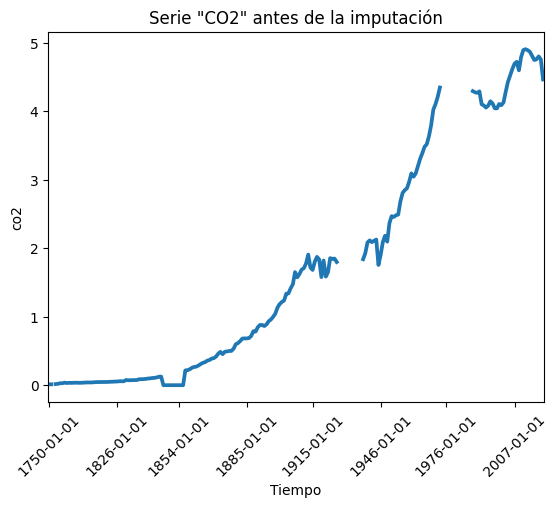

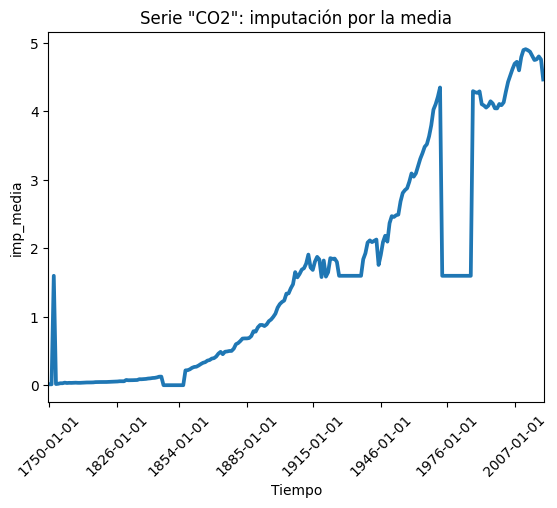

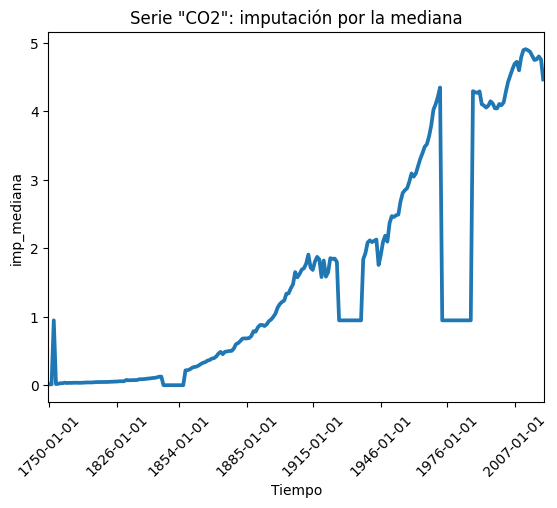

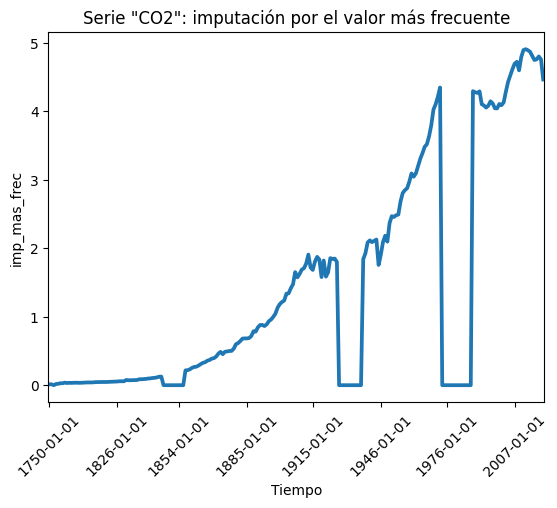

In [12]:
graficar_serie(co2_df, obs='co2', titulo='Serie "CO2" antes de la imputación')
graficar_serie(co2_df, obs='imp_media', titulo='Serie "CO2": imputación por la media')
graficar_serie(co2_df, obs='imp_mediana', titulo='Serie "CO2": imputación por la mediana')
graficar_serie(co2_df, obs='imp_mas_frec', titulo='Serie "CO2": imputación por el valor más frecuente')

En este caso vemos que la imputación por la media (ya realizada anteriormente con Pandas) y por la mediana tienen resultados similares. Sin embargo la imputación por el valor más frecuente no es adecuada: todas las observaciones faltantes se imputan con un valor de 0.

Veamos estas mismas imputaciones sobre la Serie *clicks_df*:

In [13]:
# Scikit-Learn acepta únicamente arreglos de NumPy, no DataFrames.
# Extraer arreglo de NumPy y redimensionarlo para que sea un vector de Ndatos x 1
clicks_vals = clicks_df['clicks'].to_numpy().reshape(-1,1)

# Iterar por cada estrategia, realizar y almacenar la imputación como nueva columna
# en el DataFrame original
for nombre, estrategia in estrategias:
    clicks_df[nombre] = SimpleImputer(strategy = estrategia).fit_transform(clicks_vals)

# Mostrar DataFrame resultante
clicks_df

,precio,ubicación,clicks,imp_media,imp_mediana,imp_mas_frec
fecha,,,,,,
2008-04-01,43.155647,2,18784.0,18784.0,18784.0,18784.0
2008-04-02,43.079056,1,24738.0,24738.0,24738.0,24738.0
2008-04-03,43.842609,2,15209.0,15209.0,15209.0,15209.0
2008-04-04,43.312376,1,14018.0,14018.0,14018.0,14018.0
2008-04-05,43.941176,1,11974.0,11974.0,11974.0,11974.0
...,...,...,...,...,...,...
2008-08-09,44.182033,1,6716.0,6716.0,6716.0,6716.0
2008-08-10,43.608260,1,9523.0,9523.0,9523.0,9523.0
2008-08-11,43.553363,1,8881.0,8881.0,8881.0,8881.0


Y al igual que en el caso anterior, realicemos una comparación gráfica:

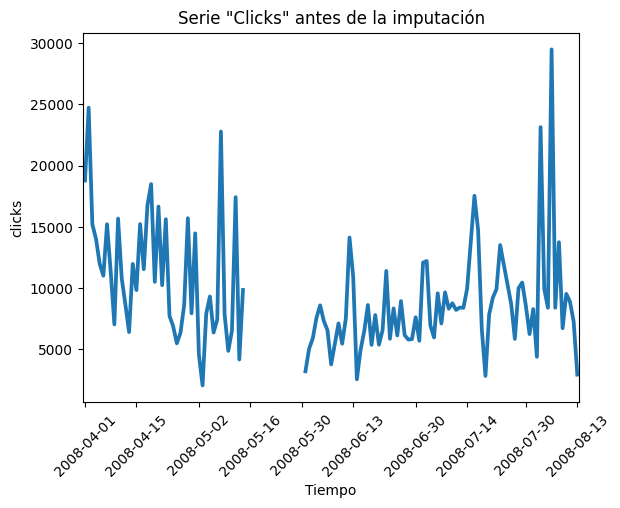

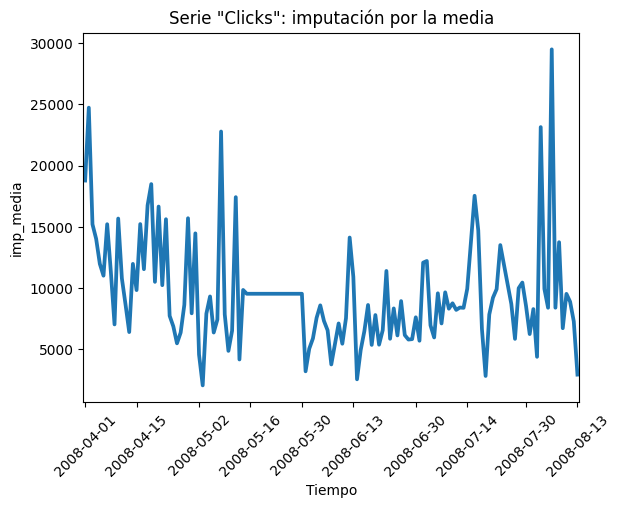

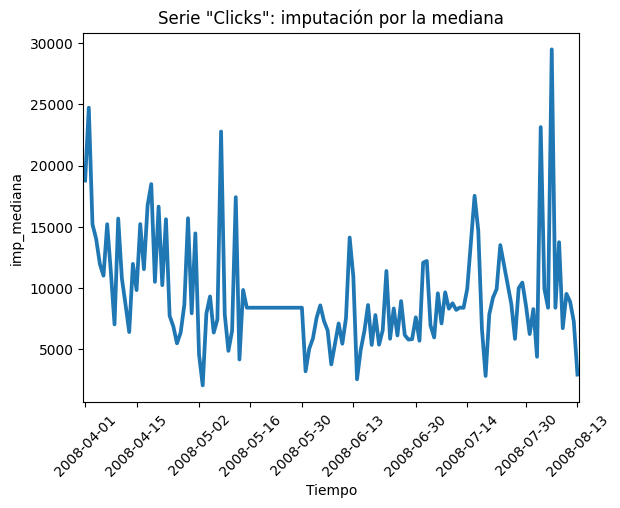

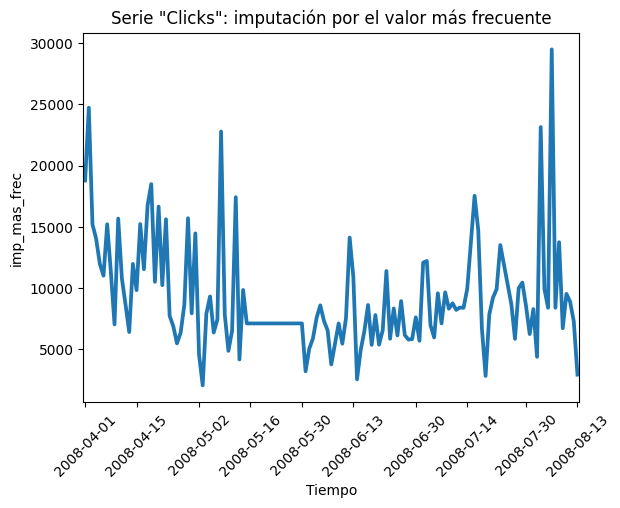

In [14]:
graficar_serie(clicks_df, obs='clicks', titulo='Serie "Clicks" antes de la imputación')
graficar_serie(clicks_df, obs='imp_media', titulo='Serie "Clicks": imputación por la media')
graficar_serie(clicks_df, obs='imp_mediana', titulo='Serie "Clicks": imputación por la mediana')
graficar_serie(clicks_df, obs='imp_mas_frec', titulo='Serie "Clicks": imputación por el valor más frecuente')

En este caso vemos que los tres métodos arrojan resultados similares.

## 3. Aspectos a tener en cuenta

Partiendo de los ejemplos anteriores podemos resumir los posibles casos de uso de cada uno de los métodos que acabamos de ver:

1. La imputación por la media o por la mediana resultan adecuadas cuando la Serie de Tiempo NO tiene tendencia o estacionalidad y cuando no hay demasiadas variaciones entre valores consecutivos de la Serie.
2. La imputación por el valor más frecuente en general NO es recomendable: no preserva (en general) las variaciones de la Serie en diferentes instantes de tiempo.
3. Las imputaciones con llenado hacia adelante (*forward fill*) y hacia atrás (*backward fill*) son adecuadas cuando la Serie de Tiempo tiene tendencia o estacionalidad pero no son adecuadas cuando la Serie contiene valores extremos.

En resumen podemos decir que no hay un método ideal y que tendremos que ajustar el método de imputación univariada a las características propias de la Serie de Tiempo que estemos procesando. Sin embargo es importante tener en cuenta que cuando tenemos bloques con demasiadas observaciones faltantes, en general ningún método de imputación resultará siendo adecuado.